In [1]:
from qcodes.tests.instrument_mocks import DummyChannelInstrument

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\jenielse\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\jenielse\.qcodes\logs\210903-4392-qcodes.log


In [2]:
instr = DummyChannelInstrument('instr')

In [3]:
from qcodes.instrument.graph.graph import MutableStationGraph, StationGraph
from qcodes.instrument.channel import InstrumentChannel

In [4]:
a = MutableStationGraph()

In [5]:
instr.submodules.values()

dict_values([<DummyChannel: instr_ChanA of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanB of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanC of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanD of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanE of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanF of DummyChannelInstrument: instr>, ChannelList(<DummyChannelInstrument: instr>, DummyChannel, [<DummyChannel: instr_ChanA of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanB of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanC of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanD of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanE of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanF of DummyChannelInstrument: instr>])])

In [6]:
a[instr.full_name] = instr

for submodule in instr.submodules.values():
    if isinstance(submodule, InstrumentChannel):
        a[submodule.full_name] = submodule.full_name
        a[instr.full_name, submodule.full_name] = StationGraph.Edge.Inactive

In [7]:
a._graph.nodes

NodeView(('instr', 'instr_ChanA', 'instr_ChanB', 'instr_ChanC', 'instr_ChanD', 'instr_ChanE', 'instr_ChanF'))

In [8]:
instr.submodules

{'A': <DummyChannel: instr_ChanA of DummyChannelInstrument: instr>,
 'B': <DummyChannel: instr_ChanB of DummyChannelInstrument: instr>,
 'C': <DummyChannel: instr_ChanC of DummyChannelInstrument: instr>,
 'D': <DummyChannel: instr_ChanD of DummyChannelInstrument: instr>,
 'E': <DummyChannel: instr_ChanE of DummyChannelInstrument: instr>,
 'F': <DummyChannel: instr_ChanF of DummyChannelInstrument: instr>,
 'channels': ChannelList(<DummyChannelInstrument: instr>, DummyChannel, [<DummyChannel: instr_ChanA of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanB of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanC of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanD of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanE of DummyChannelInstrument: instr>, <DummyChannel: instr_ChanF of DummyChannelInstrument: instr>])}

In [9]:
import networkx as nx

In [10]:
nx.draw(b)

NameError: name 'b' is not defined

In [14]:
from ipycytoscape import CytoscapeWidget
import ipycytoscape

In [15]:
b = nx.Graph.copy(a._graph)

AttributeError: 'MutableStationGraph' object has no attribute 'graph'

In [16]:
for node in b.nodes.values():
    node['value'] = None

NameError: name 'b' is not defined

In [17]:
cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(b)
display(cyto)

NameError: name 'b' is not defined

In [124]:
class CustomNode(ipycytoscape.Node):
    def __init__(self, name, classes=''):
        super().__init__()
        self.data['id'] = name
        self.classes = classes

n1 = CustomNode("node 1", classes='class1')
n2 = CustomNode("node 2", classes='class2')

G = nx.Graph()

G.add_node(n1)
G.add_node(n2)

G.add_edge(n1, n2)

custom_inherited = ipycytoscape.CytoscapeWidget()
custom_inherited.graph.add_graph_from_networkx(G)
custom_inherited.set_style([
                        {
                            'selector': 'node.class1',
#                             'css': {
#                                 'background-color': 'red'
#                             },
                            'style': {
                                'font-family': 'helvetica',
                                'font-size': '20px',
                                'label': 'data(label)'
                            }
                        },
                        {
                            'selector': 'node.class2',
                            'css': {
                                'background-color': 'green'
                            }
                        }])
custom_inherited

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node.class1', 'style': {'fon…

In [78]:
from enum import Enum

In [100]:
class EdgeType(str, Enum):
    Active = "Active"
    Inactive = "Inactive"
    Disconnected = "Disconnected"
    Parent = "Parent"

class Edge(ipycytoscape.Edge):
    
    def __init__(self, edgetype: EdgeType):
        super().__init__()
        self.data['id'] = str(edgetype)
        self.classes = str(edgetype)
        



In [101]:
from qcodes.instrument import Instrument
from qcodes.instrument import Parameter

class ToggleSwitch(Instrument):
    def __init__(self, name: str):
        super().__init__(name)
        self._graph = self._make_graph()
        self.switch_position = Parameter(
            "switch_position",
            unit="V",
            get_cmd=self.get_position,
            set_cmd=self.set_position,
            initial_value='a'
        )
    
    def get_position(self):
        return self._position
    
    def set_position(self, value):
        if value in ["a", "b"]:
            self._position = value
            if value == "a":
                self._graph[f"{self.name}.node_common", f"{self.name}.node_a"] =  Edge(EdgeType.Inactive)
                self._graph[f"{self.name}.node_common", f"{self.name}.node_b"] =  Edge(EdgeType.Disconnected)
            else:
                self._graph[f"{self.name}.node_common", f"{self.name}.node_b"] =  Edge(EdgeType.Inactive)
                self._graph[f"{self.name}.node_common", f"{self.name}.node_a"] =  Edge(EdgeType.Disconnected)
            
        else:
            raise ValueError()
            
    @property
    def graph(self) -> StationGraph:
        return self._graph

    def _make_graph(self):
        graph = MutableStationGraph()

        #name the nodes
        node_a = f"{self.name}.node_a"
        node_b = f"{self.name}.node_b"
        switch_node = f"{self.name}.node_common"

        #define nodes
        graph[node_a] = node_a
        graph[node_b] = node_b
        graph[switch_node] = switch_node

        #define edges
        graph[switch_node, node_a] = Edge("Disconnected")
        graph[switch_node, node_b] = Edge("Inactive")

        return graph

In [102]:
ToggleSwitch.close_all()

In [103]:
a = ToggleSwitch('a')

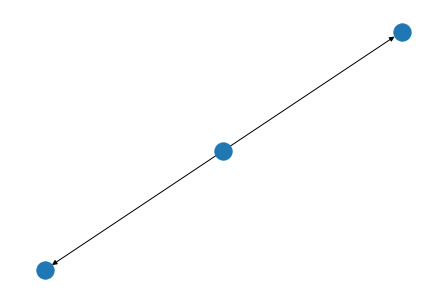

In [104]:
nx.draw(a.graph._graph)

In [105]:
def draw(self) -> None:
    """
    Draw station graph using :py:meth:`networkx.draw` and:

      * show labels of the nodes
      * show non-``None`` values of the edges (actually, showing string
        representation of ``value`` attribute of the edges if that
        ``value`` is not ``None``)
      * color active edges in red, and other edges in black
      * color nodes without values in yellow, and other nodes in blue

    """
    graph = self._graph

    positions = networkx.spring_layout(graph)

    edge_values = networkx.get_edge_attributes(graph, "value")
    edge_labels = {
        edge_name: edge_label if edge_label is not None else ""
        for edge_name, edge_label in edge_values.items()
    }

    edge_colors = [
        "k" if graph[node_from][node_to]["value"] is None else "r"
        for node_from, node_to in graph.edges()
    ]

    node_colors = [
        "b" if "value" in graph.nodes[node] else "y" for node in graph.nodes
    ]

    networkx.draw(
        graph,
        positions,
        with_labels=True,
        edge_color=edge_colors,
        width=1,
        node_size=50,
        node_color=node_colors,
    )

    networkx.draw_networkx_edge_labels(graph, positions, edge_labels=edge_labels)

In [106]:
import networkx

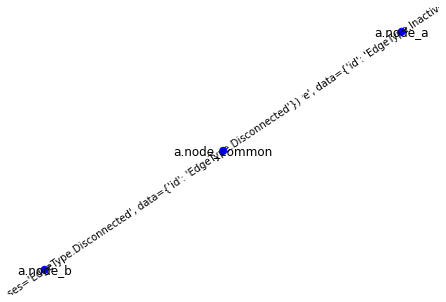

In [107]:
draw(a.graph)

In [108]:
a.switch_position('b')

In [109]:
cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(a.graph._graph)
display(cyto)

ValueError: Can't clean for JSON: Edge(classes='EdgeType.Disconnected', data={'id': 'EdgeType.Disconnected'})